Project 4241 
Model building and evaluation


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import (train_test_split, KFold, StratifiedKFold,
                                    cross_val_score, GridSearchCV, RandomizedSearchCV)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            confusion_matrix, classification_report, roc_curve,
                            roc_auc_score, precision_recall_curve, auc)
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

In [16]:
# load the dataset
df = pd.read_csv('google_play_apps_encoded.csv')

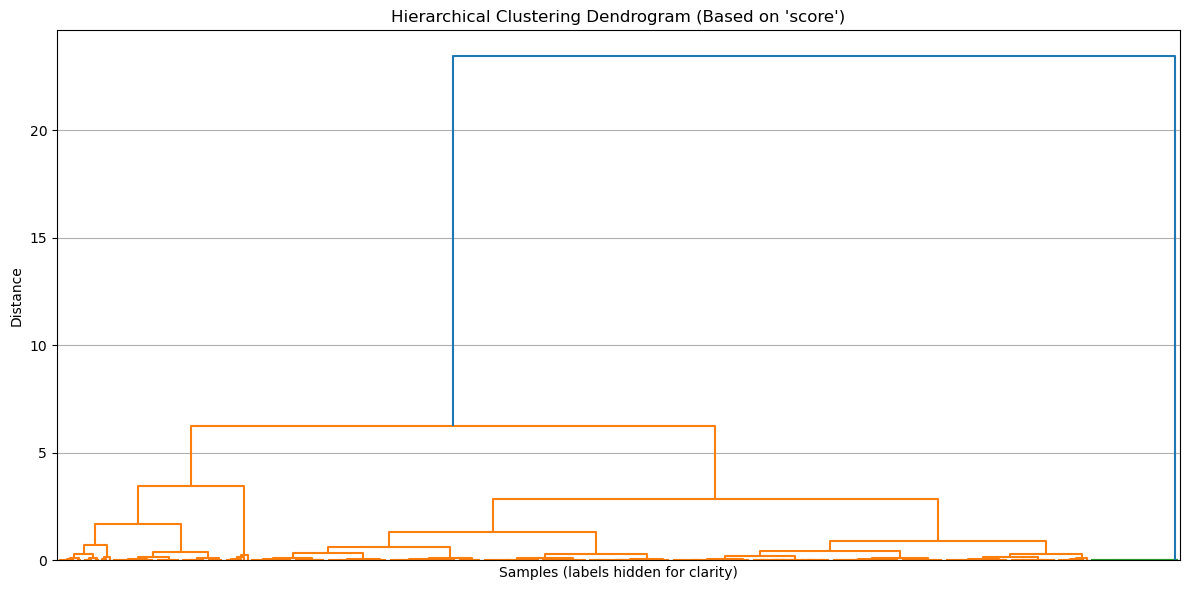

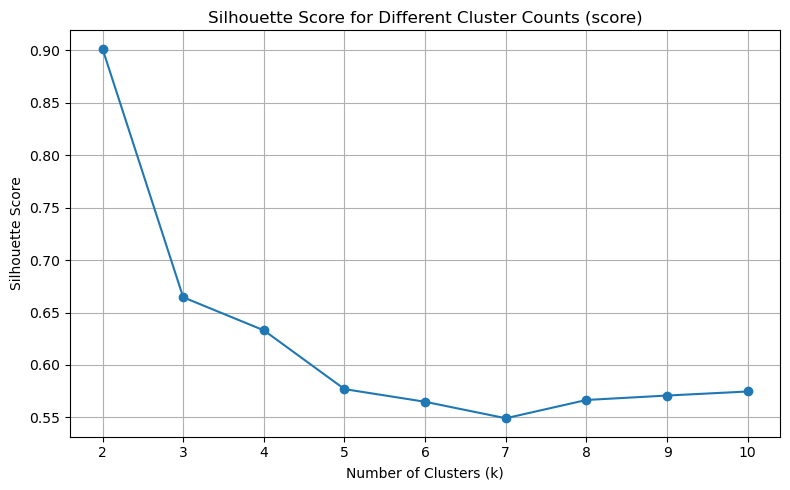

Optimal number of clusters: 2
      score  score_cluster
0  0.457713              2
1  0.334884              2
2  0.099778              2
3  0.411153              2
4  0.532715              2


In [17]:

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score



# Extract the 'score' column
X_score = df[['score']].values

# Step 1: Perform hierarchical clustering using Ward's method
linked_score = linkage(X_score, method='ward')

# Step 2: Plot the dendrogram (without overlapping labels)
plt.figure(figsize=(12, 6))
dendrogram(
    linked_score,
    orientation='top',
    distance_sort='descending',
    show_leaf_counts=False,
    no_labels=True  # Suppresses overlapping labels
)
plt.title("Hierarchical Clustering Dendrogram (Based on 'score')")
plt.xlabel("Samples (labels hidden for clarity)")
plt.ylabel("Distance")
plt.tight_layout()
plt.grid(True)
plt.show()

# Step 3: Determine optimal number of clusters using silhouette scores
silhouette_scores = []
cluster_range = range(2, 11)

for k in cluster_range:
    labels = fcluster(linked_score, k, criterion='maxclust')
    score = silhouette_score(X_score, labels)
    silhouette_scores.append(score)

# Step 4: Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Score for Different Cluster Counts (score)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 5: Assign final cluster labels based on best silhouette score
optimal_k = cluster_range[np.argmax(silhouette_scores)]
df['score_cluster'] = fcluster(linked_score, optimal_k, criterion='maxclust')

# Display result
print(f"Optimal number of clusters: {optimal_k}")
print(df[['score', 'score_cluster']].head())

# Optional: Save clustered data
# df.to_csv('clustered_scores.csv', index=False)


In [22]:
## updated
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Load dataset
df = pd.read_csv("google_play_apps_encoded.csv")

# Features and target
X = df.drop(columns=["installsPerMonth"])
y = df["installsPerMonth"]

# Fill missing values
X = X.fillna(X.mean())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Evaluation
print("Linear Regression")
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Linear Regression
R² Score: -0.08117434783023114
RMSE: 1.1732580394599694


In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv("google_play_apps_encoded.csv")

# Define features and target
X = df.drop(columns=['installsPerMonth'])
y = df['installsPerMonth']

# Handle any missing values
X = X.fillna(X.mean())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print performance metrics
print("Random Forest Regressor Results:")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")


Random Forest Regressor Results:
R² Score: -0.1983
RMSE: 1.2352


In [28]:
# updated
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("google_play_apps_encoded.csv")

# Define features and target
X = df.drop(columns=["installsPerMonth"])
y = df["installsPerMonth"]

# Fill missing values
X = X.fillna(X.mean())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(
    n_estimators=100,       # Number of boosting stages (trees)
    learning_rate=0.1,      # Shrinks each tree's contribution
    max_depth=3,            # Depth of each tree
    random_state=42
)
gbr.fit(X_train, y_train)

# Predict and evaluate
y_pred = gbr.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Output results
print("Gradient Boosting Regressor")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")


Gradient Boosting Regressor
R² Score: 0.1112
RMSE: 1.0638


R² Score: -0.1983012608462289
RMSE: 1.2351755332583403

Top Feature Importances (Permutation):
                             Feature  Importance_Mean  Importance_Std
22          genre_consolidated_TOOLS         0.101160        0.049093
16  genre_consolidated_ENTERTAINMENT         0.057784        0.008755
8      description_readability_score         0.049648        0.024411
4               maxInAppProductPrice         0.043545        0.066838
12          description_reading_time         0.024858        0.028348
13              summary_reading_time         0.023206        0.013117
21   genre_consolidated_PRODUCTIVITY         0.022839        0.016797
9            description_grade_level         0.022247        0.031974
7                    updatesPerMonth         0.014538        0.021212
25           genre_consolidated_game         0.013398        0.011164


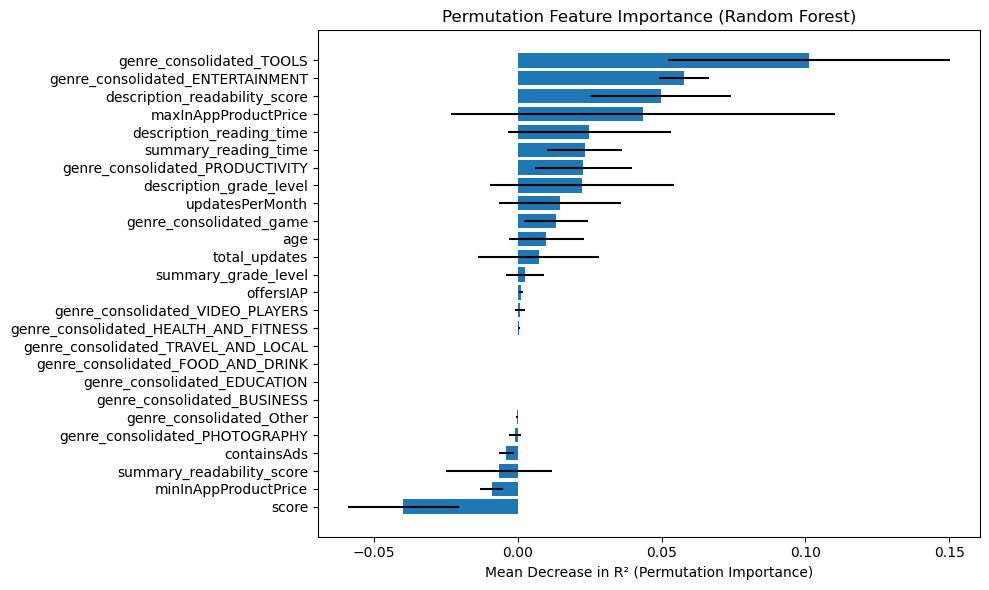

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt



# Define features and target
X = df.drop(columns=['installsPerMonth'])
y = df['installsPerMonth']

# Handle missing values
X = X.fillna(X.mean())

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Compute permutation importance
result = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=42)

# Create a DataFrame for sorted feature importances
perm_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance_Mean': result.importances_mean,
    'Importance_Std': result.importances_std
}).sort_values(by='Importance_Mean', ascending=False)

# Display top features
print("\nTop Feature Importances (Permutation):")
print(perm_df.head(10))

# Plot
plt.figure(figsize=(10, 6))
plt.barh(perm_df['Feature'], perm_df['Importance_Mean'], xerr=perm_df['Importance_Std'])
plt.xlabel("Mean Decrease in R² (Permutation Importance)")
plt.title("Permutation Feature Importance (Random Forest)")
plt.gca().invert_yaxis()  # Highest importance on top
plt.tight_layout()
plt.show()


In [26]:
# feature engineering


# Load the dataset
df = pd.read_csv("google_play_apps_encoded.csv")

# Feature Engineering
df['log_installsPerMonth'] = np.log1p(df['installsPerMonth'])  # Log-transformed target
df['iap_price_range'] = df['maxInAppProductPrice'] - df['minInAppProductPrice']  # Price range
df['score_to_age_ratio'] = df['score'] / (df['age'] + 1)  # Score normalized by age
df['readability_blend'] = (df['description_readability_score'] + df['summary_readability_score']) / 2  # Combined readability
df['update_density'] = df['total_updates'] / (df['age'] + 1)  # Updates per unit age
df['score_reading_interact'] = df['score'] * df['description_reading_time']  # Interaction term

# Save updated dataset
df.to_csv("google_play_apps_with_features.csv", index=False)


In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv("google_play_apps_encoded.csv")

# Feature Engineering
df['log_installsPerMonth'] = np.log1p(df['installsPerMonth'])
df['iap_price_range'] = df['maxInAppProductPrice'] - df['minInAppProductPrice']
df['score_to_age_ratio'] = df['score'] / (df['age'] + 1)
df['readability_blend'] = (df['description_readability_score'] + df['summary_readability_score']) / 2
df['update_density'] = df['total_updates'] / (df['age'] + 1)
df['score_reading_interact'] = df['score'] * df['description_reading_time']

# Define features and log-transformed target
X = df.drop(columns=["installsPerMonth", "log_installsPerMonth"])
y = df["log_installsPerMonth"]

# Handle missing values
X = X.fillna(X.mean())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gbr.fit(X_train, y_train)

# Predict and evaluate
y_pred = gbr.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Output performance metrics
print("Gradient Boosting Regressor on Engineered Features")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")


Gradient Boosting Regressor on Engineered Features
R² Score: -0.1801
RMSE: 0.5217
